In [73]:
from __future__ import print_function
import torch
from torch import tensor

# Tensor

In [74]:
x = torch.empty(5, 3)
print(x)

tensor([[9.2755e-39, 9.1837e-39, 9.3674e-39],
        [1.0745e-38, 1.0653e-38, 9.5510e-39],
        [1.0561e-38, 1.0194e-38, 1.1112e-38],
        [1.0561e-38, 9.9184e-39, 1.0653e-38],
        [4.1327e-39, 1.0194e-38, 1.0469e-38]])


In [75]:
x = torch.rand(5, 3)
print(x)

tensor([[0.8359, 0.7447, 0.9789],
        [0.6049, 0.1758, 0.4272],
        [0.9741, 0.5034, 0.8283],
        [0.6615, 0.7841, 0.2948],
        [0.9955, 0.7324, 0.5644]])


In [76]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [77]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [78]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

# Returns a tensor with the same size as input that is filled with random numbers from a normal distribution with mean 0 and variance 1.
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.5117,  1.0726, -0.2873],
        [-2.0101,  0.8948,  0.9089],
        [ 1.2903,  0.5877, -0.9338],
        [ 0.6009,  0.0768,  0.6720],
        [-1.8931, -0.0958, -0.8193]])


In [79]:
print(x.size())

torch.Size([5, 3])


# Operation

In [80]:
y = torch.rand(5, 3)
print(x + y)
print(torch.add(x, y))
y.add_(x)
print(y)

# Note: Modifying the operation of a tensor in-place ends with an underscore. For example: x.copy_(y), x.t_(), both modify x.

tensor([[-0.0035,  1.4080, -0.2609],
        [-1.8726,  1.1302,  1.4621],
        [ 1.5476,  1.3297, -0.8472],
        [ 1.4075,  0.7569,  1.0352],
        [-1.0777,  0.2137, -0.5813]])
tensor([[-0.0035,  1.4080, -0.2609],
        [-1.8726,  1.1302,  1.4621],
        [ 1.5476,  1.3297, -0.8472],
        [ 1.4075,  0.7569,  1.0352],
        [-1.0777,  0.2137, -0.5813]])
tensor([[-0.0035,  1.4080, -0.2609],
        [-1.8726,  1.1302,  1.4621],
        [ 1.5476,  1.3297, -0.8472],
        [ 1.4075,  0.7569,  1.0352],
        [-1.0777,  0.2137, -0.5813]])


# Tensor的变换

In [81]:
print(x[:, 1])

tensor([ 1.0726,  0.8948,  0.5877,  0.0768, -0.0958])


In [82]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # -1的意思是让PyTorch自己推断出第一维的大小。
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [83]:
x = torch.randn(1)
print(x)
#输出的是一个Tensor
tensor([-0.6966])

print(x.item())
#输出的是一个数
-0.6966081857681274

tensor([-0.1996])
-0.19955870509147644


-0.6966081857681274

# Tensor与Numpy的互相转换

## Torch Tensor和NumPy数组的转换非常容易。它们会共享内存地址，因此修改一方会影响另一方。把一个Torch Tensor转换成NumPy数组的代码示例为：

In [84]:
a = torch.ones(5)
print(a)
#tensor([ 1.,  1.,  1.,  1.,  1.])

tensor([1., 1., 1., 1., 1.])


In [85]:
b = a.numpy()
print(b)
#[1. 1. 1. 1. 1.]

[1. 1. 1. 1. 1.]


In [86]:
a.add_(1)
print(a)
# tensor([ 2.,  2.,  2.,  2.,  2.])
print(b)
# [2. 2. 2. 2. 2.]

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [87]:
import numpy as np
a = np.ones(5)
'''
把numpy转成torch
'''
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
# [2. 2. 2. 2. 2.]
print(b)
# tensor([ 2.,  2.,  2.,  2.,  2.], dtype=torch.float64)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


# CUDA Tensor

In [88]:
# 如果有CUDA
# 我们会使用``torch.device``来把tensors放到GPU上
if torch.cuda.is_available():
	device = torch.device("cuda")          # 一个CUDA device对象。
	y = torch.ones_like(x, device=device)  # 直接在GPU上创建tensor
	x = x.to(device)                       # 也可以使用``.to("cuda")``把一个tensor从CPU移到GPU上
	z = x + y
	print(z)
	print(z.to("cpu", torch.double))       # ``.to``也可以在移动的过程中修改dtype
	
# 输出：
tensor([ 0.3034], device='cuda:0')
tensor([ 0.3034], dtype=torch.float64)	

tensor([0.8004], device='cuda:0')
tensor([0.8004], dtype=torch.float64)


tensor([0.3034], dtype=torch.float64)

# Autograd: 自动求导

#### PyTorch的核心是autograd包。 我们首先简单的了解一些，然后用PyTorch开始训练第一个神经网络。autograd为所有用于Tensor的operation提供自动求导的功能。我们通过一些简单的例子来学习它基本用法。

#### 
从自动求导看Tensor
torch.Tensor 是这个包的核心类。如果它的属性requires_grad是True，那么PyTorch就会追踪所有与之相关的operation。当完成(正向)计算之后， 我们可以调用backward()，PyTorch会自动的把所有的梯度都计算好。与这个tensor相关的梯度都会累加到它的grad属性里。

如果不想计算这个tensor的梯度，我们可以调用detach()，这样它就不会参与梯度的计算了。为了阻止PyTorch记录用于梯度计算相关的信息(从而节约内存)，我们可以使用 with torch.no_grad()。这在模型的预测时非常有用，因为预测的时候我们不需要计算梯度，否则我们就得一个个的修改Tensor的requires_grad属性，这会非常麻烦。

关于autograd的实现还有一个很重要的Function类。Tensor和Function相互连接从而形成一个有向无环图, 这个图记录了计算的完整历史。每个tensor有一个grad_fn属性来引用创建这个tensor的Function(用户直接创建的Tensor，这些Tensor的grad_fn是None)。

如果你想计算梯度，可以对一个Tensor调用它的backward()方法。如果这个Tensor是一个scalar(只有一个数)，那么调用时不需要传任何参数。如果Tensor多于一个数，那么需要传入和它的shape一样的参数，表示反向传播过来的梯度。

#### 创建tensor时设置属性requires_grad=True，PyTorch就会记录用于反向梯度计算的信息：

In [89]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


#### 然后我们通过operation产生新的tensor：

In [90]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


#### 是通过operation产生的tensor，因此它的grad_fn不是None。

In [91]:
print(y.grad_fn)
# <AddBackward0 object at 0x7f35409a68d0>

#### 再通过y得到z和out

In [92]:
z = y * y * 3
out = z.mean()

print(z, out)
# z = tensor([[ 27.,  27.],[ 27.,  27.]]) 
# out = tensor(27.)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


#### requires_grad_()函数会修改一个Tensor的requires_grad。

In [93]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


#### 梯度
现在我们里反向计算梯度。因为out是一个scalar，因此out.backward()等价于out.backward(torch.tensor(1))。

In [94]:
out.backward()

#### 我们可以打印梯度d(out)/dx：

In [95]:
print(x.grad)
# tensor([[ 4.5000,  4.5000],[ 4.5000,  4.5000]])

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


我们手动计算来验证一下。为了简单，我们把out记为o。 o=14∑izi, zi=3(xi+2)2 并且 zi∣∣xi=1=27。

因此，∂o∂xi=32(xi+2)，因此∂o∂xi∣∣xi=1=92=4.5。

我们也可以用autograd做一些很奇怪的事情！比如y和x的关系是while循环的关系(似乎很难用一个函数直接表示y和x的关系？对x不断平方直到超过1000，这是什么函数？)

In [96]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
	y = y * 2

print(y)
# tensor([ -692.4808,  1686.1211,   667.7313])

tensor([-913.7019,  272.0010,  759.0128], grad_fn=<MulBackward0>)


In [97]:
gradients = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(gradients)

print(x.grad)
# tensor([  102.4000,  1024.0000,     0.1024])

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


#### 我们可以使用”with torch.no_grad()”来停止梯度的计算：

In [98]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
	print((x ** 2).requires_grad)

True
True
False


In [99]:
x = torch.tensor([2., 1.], requires_grad=True)
y = torch.tensor([[1., 2.], [3., 4.]], requires_grad=True)

z = torch.mm(x.view(1, 2), y)
print(f"z:{z}")
z.backward(torch.Tensor([[1., 0]]), retain_graph=True)
print(f"x.grad: {x.grad}")
print(f"y.grad: {y.grad}")

z:tensor([[5., 8.]], grad_fn=<MmBackward0>)
x.grad: tensor([1., 3.])
y.grad: tensor([[2., 0.],
        [1., 0.]])


# Pytorch神经网络介绍

#### 神经网络可以通过torch.nn包来创建。我们之前简单的了解了autograd，而nn会使用autograd来定义模型以及求梯度。一个nn.Module对象包括了许多网络层(layer)，并且有一个forward(input)方法来返回output。如下图所示，我们会定义一个卷积网络来识别mnist图片。

#### 训练一个神经网络通常需要如下步骤：

- 定义一个神经网络，它通常有一些可以训练的参数
- 迭代一个数据集(dataset)
- 处理网络的输入
- 计算loss(会调用Module对象的forward方法)
- 计算loss对参数的梯度
- 更新参数，通常使用如下的梯度下降方法来更新：

weight = weight - learning_rate * gradient

### 定义网络

In [100]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

	def __init__(self):
		super(Net, self).__init__()
		# 输入是1个通道的灰度图，输出6个通道(feature map)，使用5x5的卷积核
		self.conv1 = nn.Conv2d(1, 6, 5)
		# 第二个卷积层也是5x5，有16个通道
		self.conv2 = nn.Conv2d(6, 16, 5)
		# 全连接层
		self.fc1 = nn.Linear(16 * 5 * 5, 120)
		self.fc2 = nn.Linear(120, 84)
		self.fc3 = nn.Linear(84, 10)
	
	def forward(self, x):
		# 32x32 -> 28x28 -> 14x14 
		x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
		# 14x14 -> 10x10 -> 5x5
		x = F.max_pool2d(F.relu(self.conv2(x)), 2)
		x = x.view(-1, self.num_flat_features(x))
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = self.fc3(x)
		return x
	
	def num_flat_features(self, x):
		size = x.size()[1:]  # 除了batch维度之外的其它维度。
		num_features = 1
		for s in size:
			num_features *= s
		return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#### 我们只需要定义forward函数，而backward函数会自动通过autograd创建。在forward函数里可以使用任何处理Tensor的函数。我们可以使用函数net.parameters()来得到模型所有的参数。

In [101]:
params = list(net.parameters())
print(len(params))
# 10
print(params[0].size())  # conv1的weight
# torch.Size([6, 1, 5, 5])

10
torch.Size([6, 1, 5, 5])


### 测试网络

#### 接着我们尝试一个随机的32x32的输入来检验(sanity check)网络定义没有问题。注意：这个网络(LeNet)期望的输入大小是32x32。如果使用MNIST数据集(28x28)，我们需要缩放到32x32。

In [102]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0034, -0.1568,  0.0167,  0.0894, -0.1450, -0.0211,  0.0329,  0.0061,
          0.1217, -0.0495]], grad_fn=<AddmmBackward0>)


#### 默认的梯度会累加，因此我们通常在backward之前清除掉之前的梯度值：

In [103]:
net.zero_grad()
out.backward(torch.randn(1, 10))

#### 注意：torch.nn只支持mini-batches的输入。整个torch.nn包的输入都必须第一维是batch，即使只有一个样本也要弄成batch是1的输入。
#### 比如，nn.Conv2d的输入是一个4D的Tensor，shape是nSamples x nChannels x Height x Width。如果你只有一个样本(nChannels x Height x Width)，那么可以使用input.unsqueeze(0)来增加一个batch维。

### 损失函数

#### 损失函数的参数是(output, target)对，output是模型的预测，target是实际的值。损失函数会计算预测值和真实值的差别，损失越小说明预测的越准。

#### PyTorch提供了这里有许多不同的损失函数： http://pytorch.org/docs/nn.html#loss-functions。最简单的一个损失函数是：nn.MSELoss，它会计算预测值和真实值的均方误差。比如：

In [104]:
output = net(input)
target = torch.arange(1, 11)  # 随便伪造的一个“真实值” 
target = target.view(1, -1)  # 把它变成output的shape(1, 10) 
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(38.4837, grad_fn=<MseLossBackward0>)


#### 如果从loss往回走，需要使用tensor的grad_fn属性，我们Negative看到这样的计算图：
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
-> view -> linear -> relu -> linear -> relu -> linear
-> MSELoss
-> loss

#### 因此当调用loss.backward()时，PyTorch会计算这个图中所有requires_grad=True的tensor关于loss的梯度。

In [105]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Add
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # Expand


### 计算梯度

#### 在调用loss.backward()之前，我们需要清除掉tensor里之前的梯度，否则会累加进去。

# 案例

### 如何进行数据处理
一般地，当我们处理图片、文本、音频或者视频数据的时候，我们可以使用python代码来把它转换成numpy数组。然后再把numpy数组转换成torch.xxxTensor。

对于处理图像，常见的lib包括Pillow和OpenCV
对于音频，常见的lib包括scipy和librosa
对于文本，可以使用标准的Python库，另外比较流行的lib包括NLTK和SpaCy
对于视觉问题，PyTorch提供了一个torchvision包(需要单独安装)，它对于常见数据集比如Imagenet, CIFAR10, MNIST等提供了加载的方法。并且它也提供很多数据变化的工具，包括torchvision.datasets和torch.utils.data.DataLoader。这会极大的简化我们的工作，避免重复的代码。

在这个教程里，我们使用CIFAR10数据集。它包括十个类别：”airplane”, “automobile”, “bird”, “cat”, “deer”, “dog”, “frog”, “horse”, “ship”,”truck”。图像的对象是3x32x32，也就是3通道(RGB)的32x32的图片。

#### 训练的步骤
- 使用torchvision加载和预处理CIFAR10训练和测试数据集。
- 定义卷积网络
- 定义损失函数
- 用训练数据训练模型
- 用测试数据测试模型

### 数据处理

通过使用torchvision，我们可以轻松的加载CIFAR10数据集。首先我们导入相关的包：

In [109]:
import torch
import torchvision
import torchvision.transforms as transforms

torchvision读取的datasets是PILImage对象，它的取值范围是[0, 1]，我们把它转换到范围[-1, 1]。

In [112]:
transform = transforms.Compose([transforms.ToTensor(),
	transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/path/to/data', train=True, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/path/to/data', train=False,
	download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
	shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
	'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting /path/to/data\cifar-10-python.tar.gz to /path/to/data
Files already downloaded and verified


我们来看几张图片，如下图所示，显示图片的代码如下：

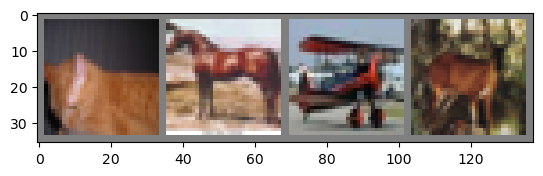

  cat horse plane  deer


In [116]:
import matplotlib.pyplot as plt
import numpy as np
import pylab

# 显示图片的函数


def imshow(img):
    img = img / 2 + 0.5     #  [-1,1] -> [0,1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # (channel, width, height) -> (width, height, channel)


# 随机选择一些图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 显示图片
imshow(torchvision.utils.make_grid(images))
plt.show()
# 打印label
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


### 定义卷积网络
- 网络结构和上一节的介绍类似，只是输入通道从1变成3。

In [117]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
	def __init__(self):
		super(Net, self).__init__()
		self.conv1 = nn.Conv2d(3, 6, 5)
		self.pool = nn.MaxPool2d(2, 2)
		self.conv2 = nn.Conv2d(6, 16, 5)
		self.fc1 = nn.Linear(16 * 5 * 5, 120)
		self.fc2 = nn.Linear(120, 84)
		self.fc3 = nn.Linear(84, 10)
	
	def forward(self, x):
		x = self.pool(F.relu(self.conv1(x)))
		x = self.pool(F.relu(self.conv2(x)))
		x = x.view(-1, 16 * 5 * 5)
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = self.fc3(x)
		return x

net = Net()

我们这里使用交叉熵损失函数，Optimizer使用带冲量的SGD。

In [118]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

我们遍历DataLoader进行训练。

In [119]:
for epoch in range(10):  # 这里只迭代2个epoch，实际应该进行更多次训练 

	running_loss = 0.0
	for i, data in enumerate(trainloader, 0):
		# 得到输入
		inputs, labels = data
		
		# 梯度清零 
		optimizer.zero_grad()
		
		# forward + backward + optimize
		outputs = net(inputs)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()
		
		# 定义统计信息
		running_loss += loss.item()
		if i % 2000 == 1999:
			print('[%d, %5d] loss: %.3f' %
				(epoch + 1, i + 1, running_loss / 2000))
		running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.001
[1,  4000] loss: 0.001
[1,  6000] loss: 0.000
[1,  8000] loss: 0.000
[1, 10000] loss: 0.001
[1, 12000] loss: 0.001
[2,  2000] loss: 0.001
[2,  4000] loss: 0.000
[2,  6000] loss: 0.001
[2,  8000] loss: 0.001
[2, 10000] loss: 0.001
[2, 12000] loss: 0.001
[3,  2000] loss: 0.000
[3,  4000] loss: 0.001
[3,  6000] loss: 0.000
[3,  8000] loss: 0.000
[3, 10000] loss: 0.001
[3, 12000] loss: 0.000
[4,  2000] loss: 0.001
[4,  4000] loss: 0.001
[4,  6000] loss: 0.001
[4,  8000] loss: 0.001
[4, 10000] loss: 0.000
[4, 12000] loss: 0.000
[5,  2000] loss: 0.001
[5,  4000] loss: 0.000
[5,  6000] loss: 0.000
[5,  8000] loss: 0.001
[5, 10000] loss: 0.000
[5, 12000] loss: 0.000
[6,  2000] loss: 0.000
[6,  4000] loss: 0.001
[6,  6000] loss: 0.000
[6,  8000] loss: 0.000
[6, 10000] loss: 0.001
[6, 12000] loss: 0.001
[7,  2000] loss: 0.000
[7,  4000] loss: 0.000
[7,  6000] loss: 0.001
[7,  8000] loss: 0.000
[7, 10000] loss: 0.001
[7, 12000] loss: 0.001
[8,  2000] loss: 0.000
[8,  4000] 

### 在测试数据集上进行测试
我们进行了2轮迭代，可以使用测试数据集上的数据来进行测试。首先我们随机抽取几个样本来进行测试。随机选择出来的测试样例如下图所示。

GroundTruth:    cat  ship  ship plane


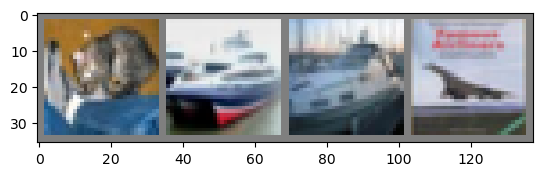

In [120]:
dataiter = iter(testloader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

我们用模型来预测一下，看看是否正确预测：

In [121]:
outputs = net(images)

outputs是10个分类的logits。我们在训练的时候需要用softmax把它变成概率(CrossEntropyLoss帮我们做了)，但是预测的时候没有必要，因为我们只需要知道哪个分类的概率大就行。

In [122]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
		for j in range(4)))

# cat  ship  ship  ship

Predicted:    cat  ship  ship plane


预测中的四个错了一个，似乎还不错。接下来我们看看在整个测试集合上的效果：

In [124]:
correct = 0
total = 0
with torch.no_grad():
	for data in testloader:
		images, labels = data
		outputs = net(images)
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
	100 * correct / total))

# Accuracy of the network on the 10000 test images: 63 %

Accuracy of the network on the 10000 test images: 63 %


看起来比随机的瞎猜要好，因为随机猜的准确率大概是10%的准确率，所以模型确实学到了一些东西。我们也可以看每个分类的准确率：

In [125]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
	for data in testloader:
		images, labels = data
		outputs = net(images)
		_, predicted = torch.max(outputs, 1)
		c = (predicted == labels).squeeze()
		for i in range(4):
			label = labels[i]
			class_correct[label] += c[i].item()
			class_total[label] += 1


for i in range(10):
	print('Accuracy of %5s : %2d %%' % (
		classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 82 %
Accuracy of  bird : 56 %
Accuracy of   cat : 44 %
Accuracy of  deer : 64 %
Accuracy of   dog : 46 %
Accuracy of  frog : 78 %
Accuracy of horse : 60 %
Accuracy of  ship : 76 %
Accuracy of truck : 66 %


# 在GPU上训练
为了在GPU上训练，我们需要把Tensor移到GPU上。首先我们看看是否有GPU，如果没有，那么我们还是fallback到CPU。

In [126]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


用GPU进行训练：

In [130]:
class Net2(nn.Module):
	def __init__(self):
		super(Net2, self).__init__()
		self.conv1 = nn.Conv2d(3, 6, 5).to(device)
		self.pool = nn.MaxPool2d(2, 2).to(device)
		self.conv2 = nn.Conv2d(6, 16, 5).to(device)
		self.fc1 = nn.Linear(16 * 5 * 5, 120).to(device)
		self.fc2 = nn.Linear(120, 84).to(device)
		self.fc3 = nn.Linear(84, 10).to(device)

	def forward(self, x):
		x = self.pool(F.relu(self.conv1(x)))
		x = self.pool(F.relu(self.conv2(x)))
		x = x.view(-1, 16 * 5 * 5)
		x = F.relu(self.fc1(x))
		x = F.relu(self.fc2(x))
		x = self.fc3(x)
		return x


net = Net2()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(20):

	running_loss = 0.0
	for i, data in enumerate(trainloader, 0):
		# 得到输入
		inputs, labels = data 
		inputs, labels = inputs.to(device), labels.to(device) 
		# 梯度清零 
		optimizer.zero_grad()
		
		# forward + backward + optimize
		outputs = net(inputs)
		loss = criterion(outputs, labels)
		loss.backward()
		optimizer.step()
		
		# 定义统计信息
		running_loss += loss.item()
		if i % 2000 == 1999:
			print('[%d, %5d] loss: %.3f' %
				(epoch + 1, i + 1, running_loss / 2000))
			running_loss = 0.0
		
print('Finished Training')

[1,  2000] loss: 2.237
[1,  4000] loss: 1.912
[1,  6000] loss: 1.699
[1,  8000] loss: 1.591
[1, 10000] loss: 1.540
[1, 12000] loss: 1.479
[2,  2000] loss: 1.418
[2,  4000] loss: 1.362
[2,  6000] loss: 1.348
[2,  8000] loss: 1.302
[2, 10000] loss: 1.310
[2, 12000] loss: 1.267
[3,  2000] loss: 1.211
[3,  4000] loss: 1.206
[3,  6000] loss: 1.201
[3,  8000] loss: 1.214
[3, 10000] loss: 1.171
[3, 12000] loss: 1.167
[4,  2000] loss: 1.090
[4,  4000] loss: 1.127
[4,  6000] loss: 1.102
[4,  8000] loss: 1.110
[4, 10000] loss: 1.114
[4, 12000] loss: 1.088
[5,  2000] loss: 1.036
[5,  4000] loss: 1.033
[5,  6000] loss: 1.044
[5,  8000] loss: 1.062
[5, 10000] loss: 1.021
[5, 12000] loss: 1.038
[6,  2000] loss: 0.962
[6,  4000] loss: 0.961
[6,  6000] loss: 0.994
[6,  8000] loss: 0.983
[6, 10000] loss: 0.981
[6, 12000] loss: 0.991
[7,  2000] loss: 0.883
[7,  4000] loss: 0.915
[7,  6000] loss: 0.936
[7,  8000] loss: 0.951
[7, 10000] loss: 0.949
[7, 12000] loss: 0.965
[8,  2000] loss: 0.849
[8,  4000] 